# Mathematik für Biologiestudierende

Wintersemester 2025/26

22. Oktober 2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

## Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)


## Themen heute

* Merkmale
* Zufallsstichproben
* Histogramme

# Merkmale

# Grundbegriffe

* die Elemente der Grundgesamtheit sind Träger von Merkmalen
* die Merkmale haben verschiedene Ausprägungen
* jedes Element der Grundgesamtheit besitzt für jedes Merkmal nur eine Ausprägung

## Typen von Merkmalen
  
* *Quantitatives Merkmal:*

    zahlenmäßig erfassbar; Zahlenwerte besitzen Bedeutung
    
    unterteilt in

    * *stetiges Merkmal:*

      Zahlenwerte variieren kontinuierlich (z.B. Gewicht, gemessene Zeit)
      </p>
      
    * *diskretes Merkmal:*

      Skala ohne Zwischenwerte (z.B. Anzahl, Zeit in Tagen)
      </p>
    
* *Qualitatives Merkmal:*

    alle anderen

## Beispiele zu den Grundbegriffen
  
Grundgesamtheit: alle Bäume einer Baumschule

* Merkmal: Art (qualitatives Merkmal) 
    
  Ausprägung:  Fichte
  </p>

* Merkmal: Größe (quantitativ stetiges Merkmal) 
  
  Ausprägung: 3.38m
  
  </p>
  
* Merkmal:  Pflanzdatum (quantitativ diskretes Merkmal) 
    
  Ausprägung: 9.10.2003



### Matrikelnummer

Ist die Matrikelnummer ein quantitatives oder ein qualitatives Merkmal?

Antwort:  Qualitatives Merkmal

## Darstellung von Merkmalen in Python

* Ausprägungen qualitativer Merkmale werden als kategorielle Daten bezeichnet
* sie werden als Zeichenketten (string) dargestellt
* Beispiel `species = "Adelie"`

* Zeichenketten werden in Anführungszeichen oder in Apostrophe eingeschlossen
* Beide Darstellungen sind gleichwertig

In [9]:
text = "The professor's favorite language is Python"
text

"The professor's favorite language is Python"

* diskrete quantitative Merkmale werden als ganze Zahlen (integer) dargestellt
* Beispiel `anzahl = 17`

* kontinuierliche quantitative Merkmale werden als Gleitkommazahlen (float) dargestellt
* Beispiel `gewicht = 4.880`

* Der Unterschied zwischen einer Gleitkommazahl und einer ganzen Zahl ist, dass die Gleitkommazahl einen Dezimalpunkt enthält, die ganze Zahl nicht
* Python kann ganze Zahlen exakt darstellen, Gleitkommazahlen nur näherungsweise
* Letzteres ist die Ursache der Rundungsfehler

* Der Dezimaltrenner in Python ist der Punkt

# Stichproben

* Eine *Stichprobe* ist eine **zufällig** gewonnene Teilmenge aus der zu untersuchenden Grundgesamtheit
* Der *Stichprobenumfang* ist die Anzahl der Elemente in der Stichprobe
* Die *Daten* sind die beobachteten Ausprägungen des Merkmals bzw. der Merkmale
* Die Erfassung der Daten geschieht in der *Urliste*, auch *Protokoll* genannt

* Die Urliste ist unveränderlich

# Zufall

* Zufall bedeutet für uns: Das nächste Element ist nicht vorhersehbar
* Zufällige Auswahl ist nicht einfach.  Man verwendet
  
  * Würfel
  * Zufallsgenerator 
  * und früher sogar gedruckte Zufallstafeln

* weil der Computer eine deterministische Maschine ist, sind die in den verschiedenen Programmiersprachen verfügbaren Zufallsgeneratoren in Wahrheit Pseudozufallsgeneratoren, berechnen also Zahlenfolgen, die für den Beobachter unvorhersehbar sind

* die Pseudozufallsgeneratoren der gängigen Programmiersprachen reichen für Versuchsplanung und Modellbildung völlig aus

## Zufallsgeneratoren in Python

Zuerst die Importe, die wir in der letzten Stunde auch schon hatten

In [17]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd

In [18]:
rng = np.random.default_rng()

Zufallsgenerator, englisch "random number generator"

In [19]:
rng.random()

0.6794500106735398

zufällige Gleitkommazahl zwischen 0 und 1

In [22]:
rng.random()

0.32667043559205156

In [24]:
rng.random()

0.6995224738108239

In [25]:
rng.random(size=5)

array([0.07395228, 0.45763486, 0.32370623, 0.78058146, 0.67916668])

In [31]:
rng.integers(10, 20)

18

`rng.integers(n, m)` zufällige ganze Zahl zwischen n (eingeschlossen) und m (ausgeschlossen)

In [48]:
liste = np.arange(10)**2
liste

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [49]:
rng.choice(liste, 15)

array([25,  1, 49,  4, 49,  9, 49, 81, 81,  4, 25, 16,  4, 36, 64])

`rng.choice` zufällige Auswahl von Elementen aus einer Liste, Wiederholungen zulässig

In [50]:
rng.choice(liste, 10, replace=False)

array([ 9, 64,  0, 81, 25, 16,  1, 36,  4, 49])

mit `replace = False` werden Wiederholungen verboten

## Seeding

In [51]:
rng = np.random.default_rng(1234)

In [52]:
rng.integers(1, 10, size=5)

array([9, 9, 9, 4, 2])

In [53]:
rng.integers(1, 10, size=5)

array([9, 1, 3, 2, 3])

In [54]:
rng = np.random.default_rng(1234)

In [55]:
rng.integers(1, 10, size=5)

array([9, 9, 9, 4, 2])

Wozu soll das gut sein?

* um beim Test von Programmen definierte Ausgangslagen zu haben

## Beispiel zur Versuchsplanung

Folgendes Experiment:

* 25 Fische zufällig ausgewählt

* Fische lernen, in einem Labyrinth Futter zu suchen; Zeit wird gemessen

* die Fische werden an 25 Artgenossen verfüttert

* die Artgenossen sollen im selben Labyrinth Futter suchen; Zeit wird gemessen

* die neuen Fische sind schneller

* Nobelpreis?

# Grafiken

* Balkendiagramm:  Für jeden möglichen Wert ein Balken, der die Anzahl anzeigt
* Histogramm:  Wie Balkendiagramm, aber Werte werden vorher in Klassen zusammengefasst

  Bei Stichprobenumfang $n$: Anzahl der Klassen ungefähr $\sqrt n$
* Tortendiagramm:  Anteile an der Gesamtpopulation werden grafisch dargestellt

### Beispiel Pinguine

In [82]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Histogramm

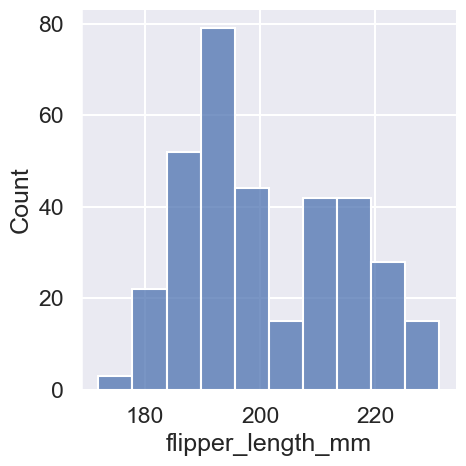

In [83]:
sns.displot(df, x='flipper_length_mm');

Die Anzahl der Fächer (bins) kann eingestellt werden

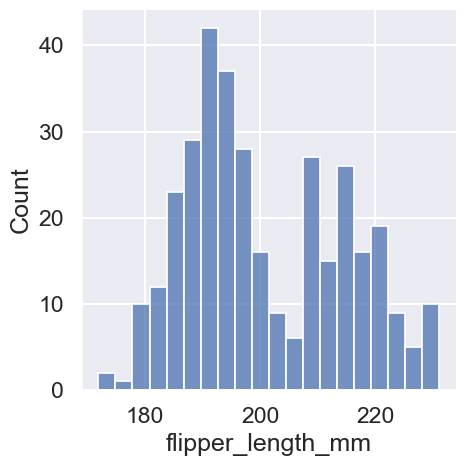

In [84]:
sns.displot(df, x='flipper_length_mm', bins=20);

Alternativ kann auch die Breite der Fächer eingestellt werden

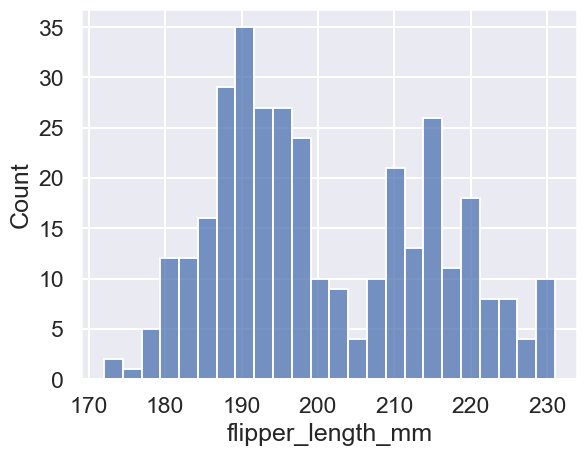

In [85]:
sns.histplot(df, x='flipper_length_mm', binwidth=2.5);

## Balkendiagramm

Bei qualitativen Merkmalen spricht man von kategoriellen Daten.  Zählt man die Vorkommen, erhält man ein Balkendiagramm.

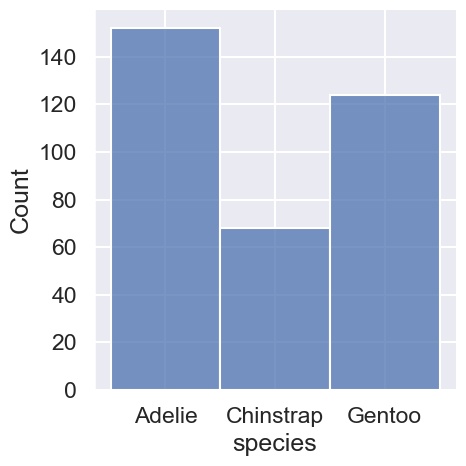

In [86]:
sns.displot(df, x='species');

### Pinguine

|Adelie Pinguin |Zügelpinguin      |Eselspinguin   |
|:-------------:|:----------------:|:-------------:|
|Adelie penguin |Chinstrap penguin |Gentoo penguin |
|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Antarctic%2C_adelie_penguin_%28js%29_57.jpg/250px-Antarctic%2C_adelie_penguin_%28js%29_57.jpg" alt="Adeliepinguin" width="200px"/>|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chinstrap_Penguin.jpg/330px-Chinstrap_Penguin.jpg" alt="Zügelpinguin" width="205px">|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Pygoscelis_papua.jpg/250px-Pygoscelis_papua.jpg" alt="Eselspinguin" width="225px">    |

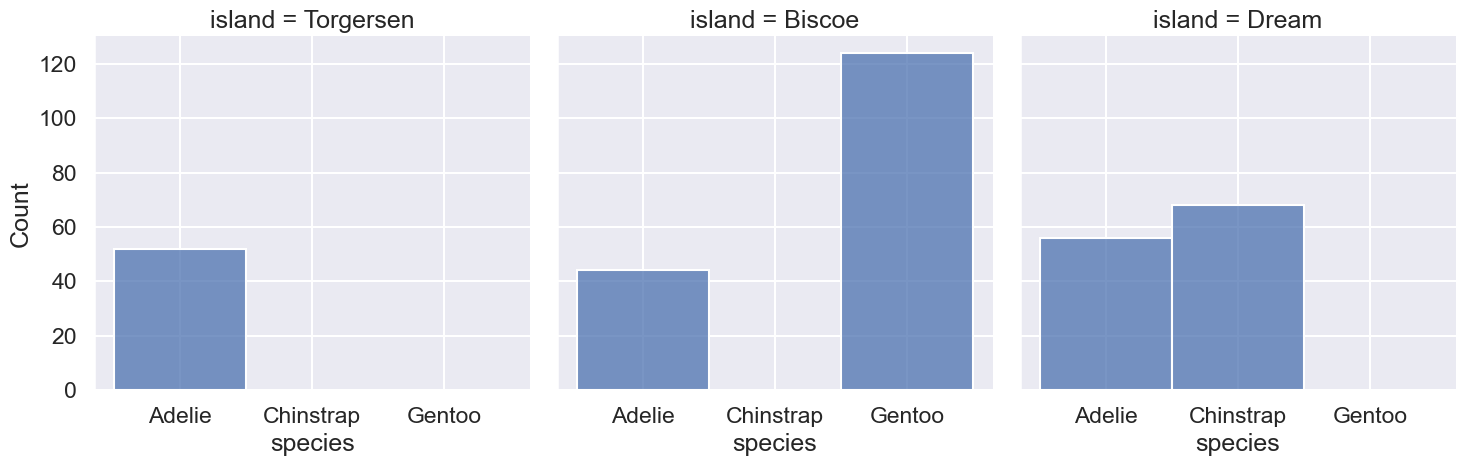

In [87]:

sns.displot(df, col='island', x='species');

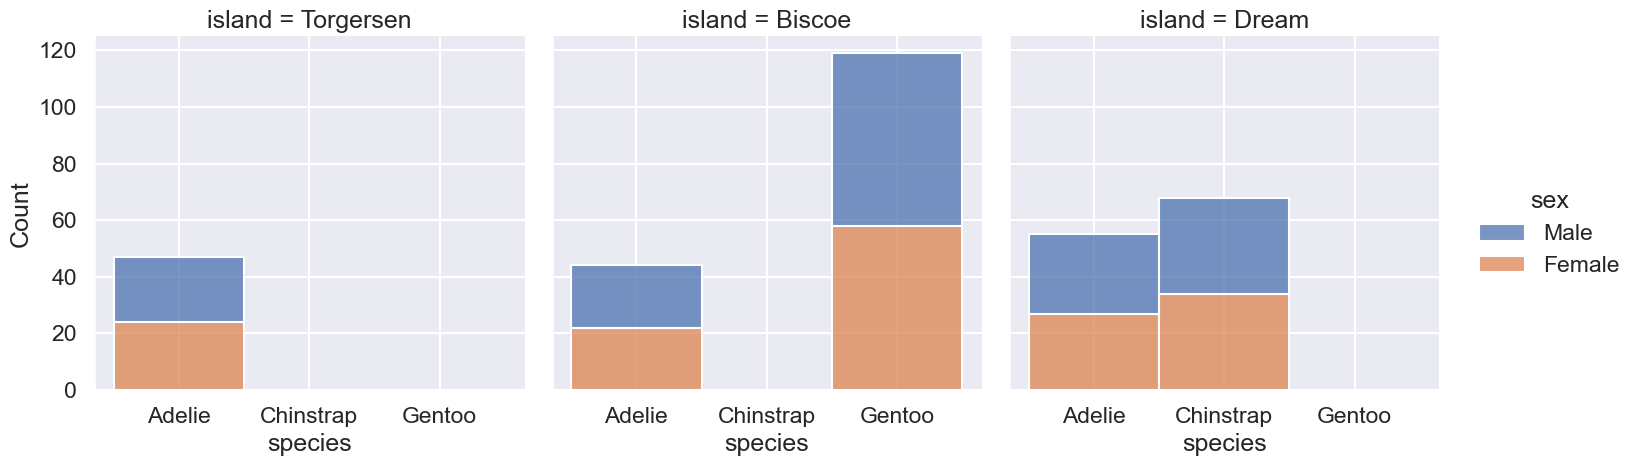

In [88]:
sns.displot(df, col='island', x='species', hue='sex', multiple="stack");
#sns.displot(df, col='island', x='species', hue='sex');

## `displot`

`displot(df, x, col, hue, binwidth)`  

* df:  DataFrame
* x: Variable auf der x-Achse, deren Elemente gezählt werden sollen, quantitativ oder kategoriell
* col: für jeden Wert dieser Variable wird ein Bild gezeichnet, kategoriell (optional)
* hue: Unterteilung der Zählung, durch Farben ausgedrückt, kategoriell (optional)
* binwidth: Breite der Fächer (optional)
* bins: Anzahl der Fächer (alternativ zu binwidth, optional)

Die Angaben für `x`, `col` und `hue` beziehen sich auf Spaltennamen des DataFrame, sie werden in Anführungszeichen gesetzt

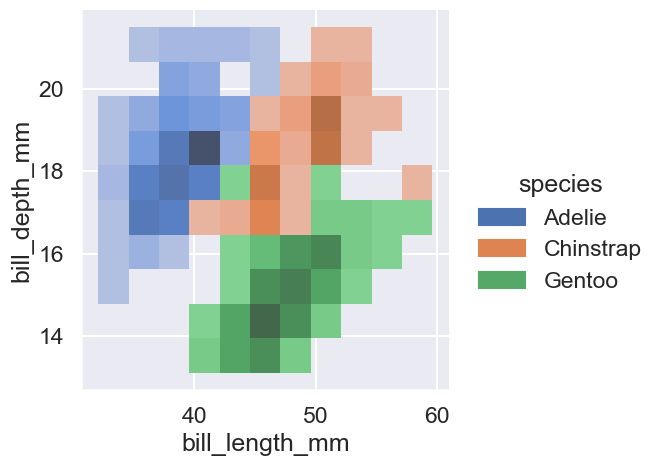

In [92]:
sns.displot(df, x='bill_length_mm', y='bill_depth_mm', hue='species');

`displot(df, x, y, col, hue, binwidth)` 

* wie oben, aber y ist ebenfalls eine Variable 
* Häufgkeiten werden durch Farbintensitäten dargestellt

Fotos:
* Adelie Pinguin: https://commons.wikimedia.org/wiki/User:Jerzystrzelecki
* Zügelpinguin: https://www.flickr.com/people/9464116@N08
* Eselspinguin: https://commons.wikimedia.org/wiki/User:Stan_Shebs